<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/pytorch_datasets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

custom datasets refer to datasets created by the user to handle data that isnt part of the commonly used standard datasets
these are typically used when you have your own datai formats like iamges, text , audio or nemerical data or when you wan to prepocess or augment existing datasets in unique ways.

## key aspocets of cusom datasets.

1. non standard dataforamts: custom datasets are used when dat isnt proforammeted for frameowkr like pytorch for example
  - iamges stored in custom folder sturcres
  - tabular data in .csv file
  - coplex strcures lke multi modela

2. flexibility: custom datasets allow you to:
  - define specific data proporcessign steps.
  - apply cusotm data augmentaion
  - integrate data form multiple soruces


3. integration with dataloaders: custom datasetsare compatible with pytorches dataloader , which can handle batching , shuffling and parallel loadingof data, simplying training pipelines

## why use custom datasets in deep learing

- real- world applcations: most deep leanring projects rely on data unique to a specific domain( eg medical iamges , satellie data , sensor readigns) . predefined datasets often dont suti these needs

- cutom preporcessing: real-world data usually requires unique preprocessing stes lke normalizaion , resizing , tokenizaion or feature extracion
- data augmentaiton: custom datasets allow youto define specific augmentaion techiques ( eg roeation, croppign for iamges) to increase dataset diversity and robustness.

- efficency: cutom datasets can handle large-scale dat efficently by loading data on demand( lazy loaidng ) instead of keepign everythign in memory




## example custom dataset in pytorch for iamge data
hre an example of custom dataset for laodig iamge from disk


```py

import torch
from torch.utils.data import Dataset
from PIL import Image
import os

class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = os.listdir(image_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = 1 if "cat" in self.image_files[idx] else 0  # Example labeling
        return image, label


```

usage with dataloader

```py

from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Load custom dataset
dataset = CustomImageDataset(image_dir="path/to/images", transform=transform)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate over batches
for images, labels in dataloader:
    print(images.shape, labels)

```

these process can adapted ot other types of data such as text , audio or numerical datasts , using similar pronciples bu twith data-speicfic proprocessing steps.




In [2]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

our datasrt is a subset of food101 dataset.
food101 start 101 different classes of food
our datasetr starts with 3 classes of food and only 10% of the iamges
why do this?
when starting our ml project its imaportat to start with small scale and then increase the scale when necessary
the whole point is to spee up how fast how can exprement

In [3]:
import requests
import zipfile # our data is in form of zip file
from pathlib import Path
# setup apth of thdata
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'
# if the imagefolder does not exist download the data and if it exits skip
if image_path.is_dir():
  print(f"{image_path} directory exists")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)# this creates the direcotry



Did not find data/pizza_steak_sushi directory, creating one...


In [4]:
# downlaod pizza, steak andsuchi data
with open(data_path/'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('downloading pizza, steak and sushi data')
  f.write(request.content)
# unzip pizza, steak, sushi data

with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('unzipping pizza, steak and sushi data')
  zip_ref.extractall(image_path)

image_path


downloading pizza, steak and sushi data
unzipping pizza, steak and sushi data


PosixPath('data/pizza_steak_sushi')

## becoming one with the data ( data preparation and data exploration)

In [5]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory

  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


In [ ]:
walk_through_dir(image_path)

there are 2 directories and 0 images in 'data/pizza_steak_sushi'
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'


In [6]:
# setup traing and testign paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## visualizing image
lets write some code to:
- get all of the imagepaths
- pick a ranom image path using ptyhon ranodm.choice

- get the image class name `pathlib.Path.parent.step`
- since were working with images lets open the image with python PIL
- well then show the image and print metadata

Random image path: data/pizza_steak_sushi/test/pizza/1503858.jpg
Image class: pizza
Image height: 384
Image width: 512


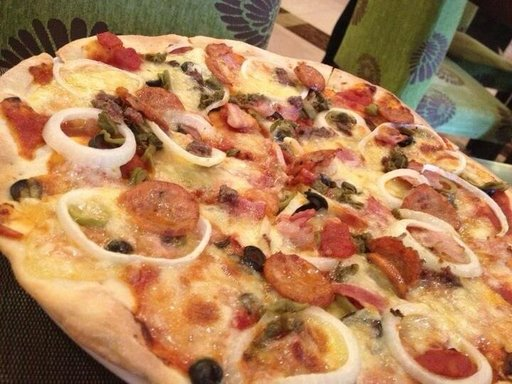

In [8]:
import random
from  PIL import Image

# set seed
#random.seed(42)

# get all  image paths

image_path_list = list(image_path.glob('*/*/*.jpg'))# list of all the images
# pick a random image path
random_image_path = random.choice(image_path_list)
random_image_path
# get image class from the path name ( the name class is teh name of the direcotry where the image is stored )
image_class = random_image_path.parent.stem # give me the calss name this is soo cool
# lets open the image using PIL

img = Image.open(random_image_path)
# show the image , this is so cool i like it  img

# print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

i### try to visualize iamge with matplotlib..



(384, 512, 3)


(-0.5, 511.5, 383.5, -0.5)

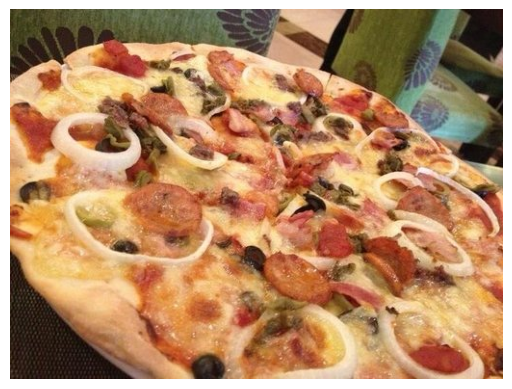

In [9]:
import numpy as np
import matplotlib.pyplot as plt # for ploting this is so cool
import matplotlib
%matplotlib inline
# turns image ot array
img_as_array = np.array(img)
# plot the image using matplotlib
plt.imshow(img_as_array)
print(img_as_array.shape)
plt.axis(False)

when plotting images using matplotlib , the image can either be a numpy array or pytorch tensor, byt ehre are some key differences in hanlding these tho formats:

1. numpy arrays:

matplotlbi is designed to work natively with numpy array if your image is a nupy array , youc an directly pass it to plt.imshow()

reuirements for numpy arrays:

-the array should have dimensiions:
  - H X W X C ( height x width x channels) for RGB images
  - H X W for grayscale images.

- the pixel values shuld be typcally be in one fo the following ranges:
  - [0,1] for normaized images ( eg floaiing point values)
  - [ o, 255] for integer (uints8) images.


example

```py

import matplotlib.pyplot as plt
import numpy as np

# Example RGB image as a NumPy array
image = np.random.rand(128, 128, 3)  # H x W x C
plt.imshow(image)
plt.title("RGB Image")
plt.axis("off")
plt.show()
```

2. pytorch tensors
if your iamge is in pytorch tesoor format, you may need to convert it to a numpy array befor plotting because matplotlib does not natively support pytorhc tensors

### key differences in tensors:

- pytorch tensors typically have dimennsions:
  - C X H X W
  - this si differenct form teh numpy format ( H X W X C ) so you need to tranopose the tensor to matpch the expected format

- if the gensor is on a GPU, you must move it to the CPU and convert it to ta NUMPY arrayusing .cpu().numpy()


example

convertion exaple

```py
import torch
import matplotlib.pyplot as plt

# Example tensor (C x H x W)
image_tensor = torch.rand(3, 128, 128)  # Random RGB image

# Convert to NumPy array
image_numpy = image_tensor.permute(1, 2, 0).numpy()  # H x W x C
plt.imshow(image_numpy)
plt.title("RGB Image from Tensor")
plt.axis("off")
plt.show()
```

### direct tensor visulaizaion (optinal)

if youre using libaresi like torchvisio , they provide utilies such as `torchvision.transforms.ToPILImage`` to convert a tesnor to a PIL image matplotlib can handle PIL image directly

example

```py

from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

image_tensor = torch.rand(3, 128, 128)  # Random RGB image

# Convert tensor to PIL Image
to_pil = ToPILImage()
image_pil = to_pil(image_tensor)

plt.imshow(image_pil)
plt.title("RGB Image from PIL")
plt.axis("off")
plt.show()

```



### tranforming data

before we can use our iamge data with pytorch or any other data:
1. turn your target data into tensors( in our case , numerical represetnaion of our iamges)
2. turn it into `torch.utils.data.Datasets` and subsequently a `torch.utils.data.DataLoader` well call these Dataset and DataLoader


In [10]:
#!pip install torchvision # this is aready incuded in my enviroment
import torch
from  torch.utils.data import DataLoader
from torchvision import datasets , transforms# the datasets here are the built in one but we dont want to use this we want to use torch.uitls.data.Dataset -> for our custom dataset


### Tranforming data with `torchvison.tranforms`

In [11]:
device

'cuda'

In [12]:
# write a tranofmr forimage
data_transform = transforms.Compose([
    # resize the images
  transforms.Resize((64,64)),
  #Fip the iamegs randomnly on the horizontal
  transforms.RandomHorizontalFlip(p=0.5),
  # turn the image into a torch tensor
  transforms.ToTensor()
])# this compine many tranform together
'''
 teh way this tranform work is like this:
 - resize the image first to size 64 by 64 first,
 - flip image horizontaly randomly
 - convert the image then to tensor and becuse they have three colour channels it the images will have the shape of (3, 64, 64) ->


 '''

'\n teh way this tranform work is like this: \n - resize the image first to size 64 by 64 first, \n - flip image horizontaly randomly \n - convert the image then to tensor and becuse they have three colour channels it the images will have the shape of (3, 64, 64) -> \n\n\n '

In [14]:
data_transform(img).shape # here i have passed oonly one image through my tranform we should be thingking of doing it to all our images but lets look at it


torch.Size([3, 64, 64])

In [17]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
  Plots a series of random images from image_paths.

  Args
    image_paths (list): List
    transform (PyTorch Transforms): Transforms to apply to images.
    n (int, optional): Number of images to plot. Defaults to 3.
    seed (int, optional): Random seed for the random generator. Defaults to 42.
  """
  random.seed(seed)# this will make sure i have a random seed
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      transformed_image = transform(f)
      ax[1].imshow(transformed_image.permute(1, 2, 0))
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape[-2:]}")
      ax[1].axis("off")
      plt.show()





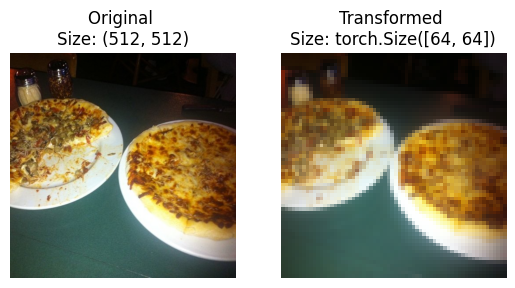

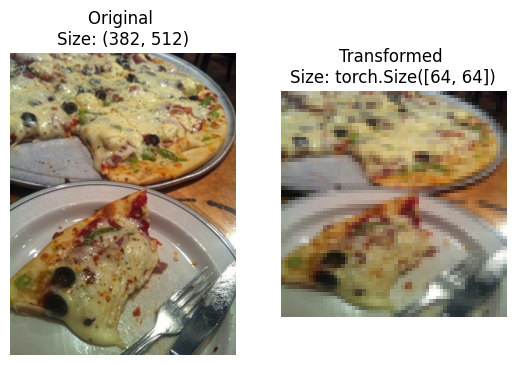

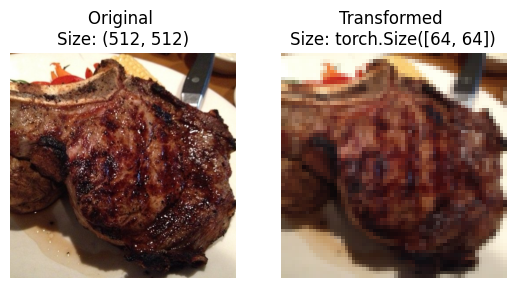

In [18]:
plot_transformed_images(image_path_list, data_transform, n=3)

### optional 1. loaidng image data using `imageFolder`
we can load image classifciaon data using `torchvision.datasets.ImageFloder`


In [19]:
# use Image Folder to create dataset(s)
''' this is how we are going to convert our image to tensors using the tranformer we have defined ubove .we are goint to use ImageFolder for this  '''

from torchvision import datasets
from torch.utils.data import DataLoader

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")


Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [20]:
# get classname as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [21]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [22]:
# check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [26]:
# index on the train_data dataset to get a single image and labl

image , label = train_data[0]
''' when i take one of the images tranformed using ImageFolder it returns two things ie image and label in that oerder  '''
class_names[label]
print(image,label)# image here is a tensor
print(image.shape)

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [27]:
print(f"image shape: {image.shape}")
print(f"label: {label}")# this will give me the information about the image and its lable this is so cool
print(f"class name:{class_names[label]}")

image shape: torch.Size([3, 64, 64])
label: 0
class name:pizza


In [28]:
# Rearange the order dimensions
img_permute = image.permute(1,2,0)
img_permute.shape
''' this is in the format in which numpy usually works in tensors ie color channels last but by default tensor have color channels first that why i have permuted  '''

' this is in the format in which numpy usually works in tensors ie color channels last but by default tensor have color channels first that why i have permuted  '

In [29]:
print(f"original image shape{image.shape}")
print(f"permute image shape{img_permute.shape}")

original image shapetorch.Size([3, 64, 64])
permute image shapetorch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

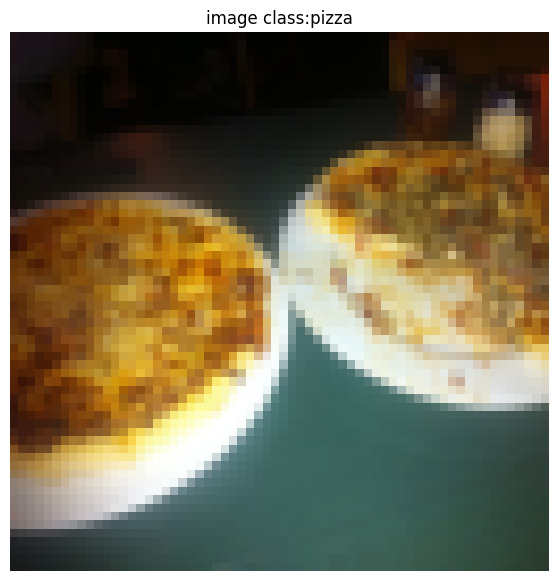

In [30]:
# plt the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"image class:{class_names[label]}")
plt.axis(False)
# once the image is permuted you can simpley draw it using matplotlib you dont have to convert it to array as said in the notes above , thiss is so cool


 ### Turn Data sets to Data loader


a dataloader is going to help us turn our dataset into itebles and can customise the batch_size so our model can learn effectively

In [33]:
# TUrn train and test datasets into DataLoaders
''' now we need to group our image tensor into batches of a given price usning dataloaders '''
import os
CPU_COUNT = os.cpu_count()
BATCH_SIZE = 1# here as am starting am setting the batch size to 1 but it is commonly 32 which we will see later
from torch.utils.data import DataLoader# ths is the class we are goint to use which is from torch not torchvision please dont forget that
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=CPU_COUNT, pin_memory=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=CPU_COUNT, pin_memory=True)


In [34]:
import os
os.cpu_count()# show how many cpu i have
''' this will show how many cpus i have in colub it it probably 2 which is very low  '''


' this will show how many cpus i have in colub it it probably 2 which is very low  '

In [37]:
!nvidia-smi
# show which nvidai gpu you have if not this will be an error
''' this will only work if you have nvidia gpu on your system for me i have one sometimes  '''
device

Wed Nov 27 14:43:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

'cuda'

In [38]:
img , label = next(iter(train_dataloader))
''' here am firt turnign the dataloader into iterable and then am picking the next iterable which is one image and becuase it is one it has size of (1,3,64,64) '''
print(f"image shape:{img.shape}") # dataloader will add a batch dimenstion so if you want to plot you have to squuze it
print(f"label shape:{label.shape}")
# you can change the batch size based on what you feel like for me i ahve s


image shape:torch.Size([1, 3, 64, 64])
label shape:torch.Size([1])


### opttion 2 loading image data with a custom 'dataset'

- want to be able to load iamge form file
- want to be able to get class names form teh dataset
- want to be able to get classes as dictinonalry form the dataset

pros:
* can create a dataset out of almost anything
- not limited topytorch prebuilt dataset functions

cons:
- even throouth you colud create dataset out of amost anythhing , it doest mean it wil work ...

- using a custom dataset often resutl in us writing more code , which could lead to erros or performance issues



In [39]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset # this is what we are going to use
from torchvision import transforms
from typing import Tuple, Dict, List
''' if you want to use your own custom dataset you have to inherit form Datset form torch and not from torchvision please dont forget this concept  '''


' if you want to use your own custom dataset you have to inherit form Datset form torch and not from torchvision please dont forget this concept  '

In [40]:
# instance of torchvision.dataset.ImageFolder()
train_data.classes, train_data.class_to_idx# we want to do this but ourself this will be so cool


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### creating a helper function to get class names

we want to fuctnion to:
- get the class names using os.scandir() to travest target directory
- raise an error if the class naems aretn found ( if this happens , there might be somethign wrong with the directory sturcre)

- turn the classnames into a dict and a list and return them

In [41]:
# setup path for target directory
target_dir = pathlib.Path(train_dir)
print(f"target directory:{target_dir}")
# get the class names fro the target directory
class_names_found = [entry.name for entry in os.scandir(target_dir) if entry.is_dir()]
class_names_found

target directory:data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [42]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str,int]]:
  """
  Finds the class names in a target directory.
  """
  # get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  # raise an error if class names not found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [43]:
find_classes(train_dir)# this is working and now we can use this

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### create a custom dataset to replciate imageFolder

to create our own custom dataset we want to:

- subclass torch.utils.data.Dataset
- init our subclass with a target directory as well as a trainform if e like to tranform our data
- create several attriutes:
  - path - paths of our iamges
  - tranform - the tranform we like to use
  - classes a list of the targe classes
  - class_to_idx - a dict of the target classes mapped to interger lables

- create a fucntion to load iamges this function will open an image
- overwrte the `__len__` to get the lenght of our dataset

- overwrite the `__getitem()__ ` to get a given sample when passed an item

In [44]:
from torch.utils.data import Dataset
# subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # intialize our custom dataset
  def __init__(self,target_dir:str, transform=None):
    self.path = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(target_dir)
  def load_image(self, index:int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.path[index]
    return Image.open(image_path)
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.path)
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.path[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx


In [46]:
# create a tranform
train_tranforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_tranforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])
''' compoese allow me to group a group of tranform together  '''


' compoese allow me to group a group of tranform together  '

In [47]:
# test out imageFoldeCustom
train_data_custom = ImageFolderCustom(train_dir, transform=train_tranforms)
test_data_custom = ImageFolderCustom(test_dir, transform=test_tranforms)


In [48]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x796255227130>,
 <__main__.ImageFolderCustom at 0x796255227520>)

In [49]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})


### create a fuction to display random images

- take in a dataset and a number of other parametes such as class names and how many images to visualize
- to prevent the display getting out of hand , let cap the numbe ro image to see at 10

- set the random seed for reproducibility
- get a list of ranodm sample indexes form the target dataset .

- setupu a matploblib plot
- loop thourgh the ranodm smaple iames and plot them with matplotlib

- make sure the dimenstions of your images lineup with matplotlib(HWC)



In [50]:
# create a function to take in dataset

def display_random_images(dataset, classes, n=10, seed=42,display_shape: bool = True):
  # adjust display if n is to high
  if n > 10:
    n = 10
    display_shape = False
  # set the ranodm seed
  if seed:
    random.seed(seed)
  # get ranodm sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)
  #setup plot
  plt.figure(figsize=(16,8))
  plt.subplots_adjust(hspace=0.5)

  # loop thorugh ranodm inexes and plot them with maptplotlib
  for i , targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_image_shape = targ_image.shape
    targ_image = targ_image.permute(1,2,0)
    ax = plt.subplot(2,5,i+1)
    ax.imshow(targ_image)
    if classes:
      title = f"class: {classes[targ_label]}"
    else:
      title = f"label: {targ_label}"
    ax.set_title(title)
    ax.axis(False)
    if display_shape:
      plt.title(f"shape:{targ_image_shape}")



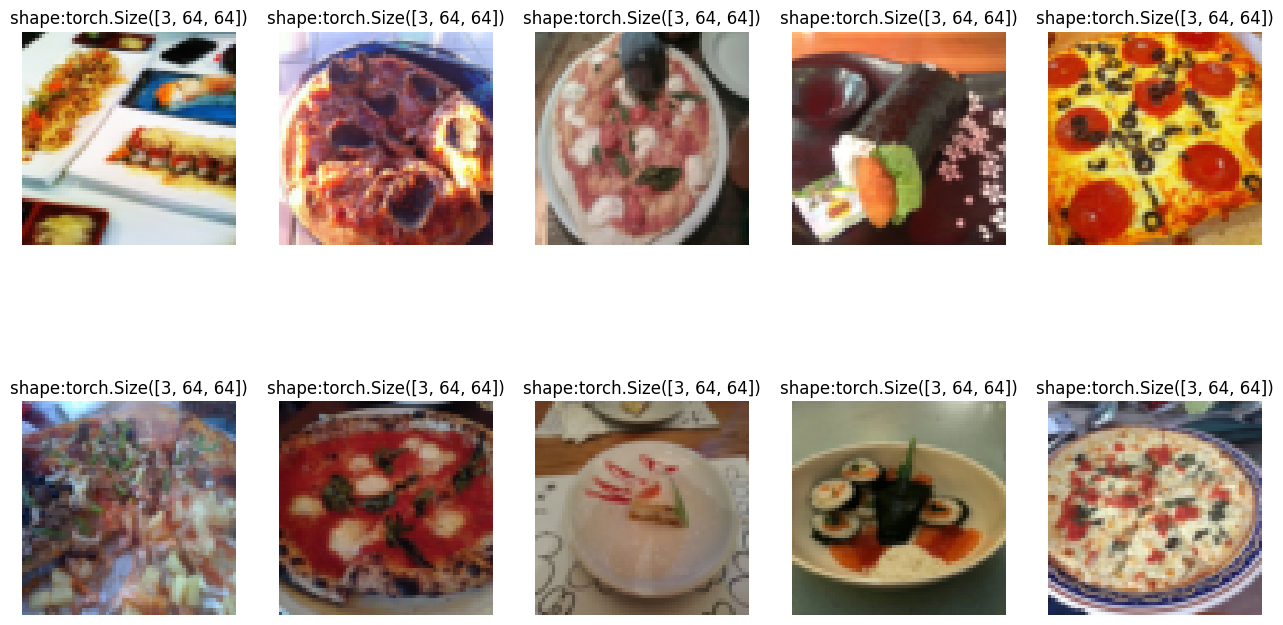

In [51]:
# display ranodom image from teh IMageFolder created dataset
display_random_images(train_data, train_data.classes)

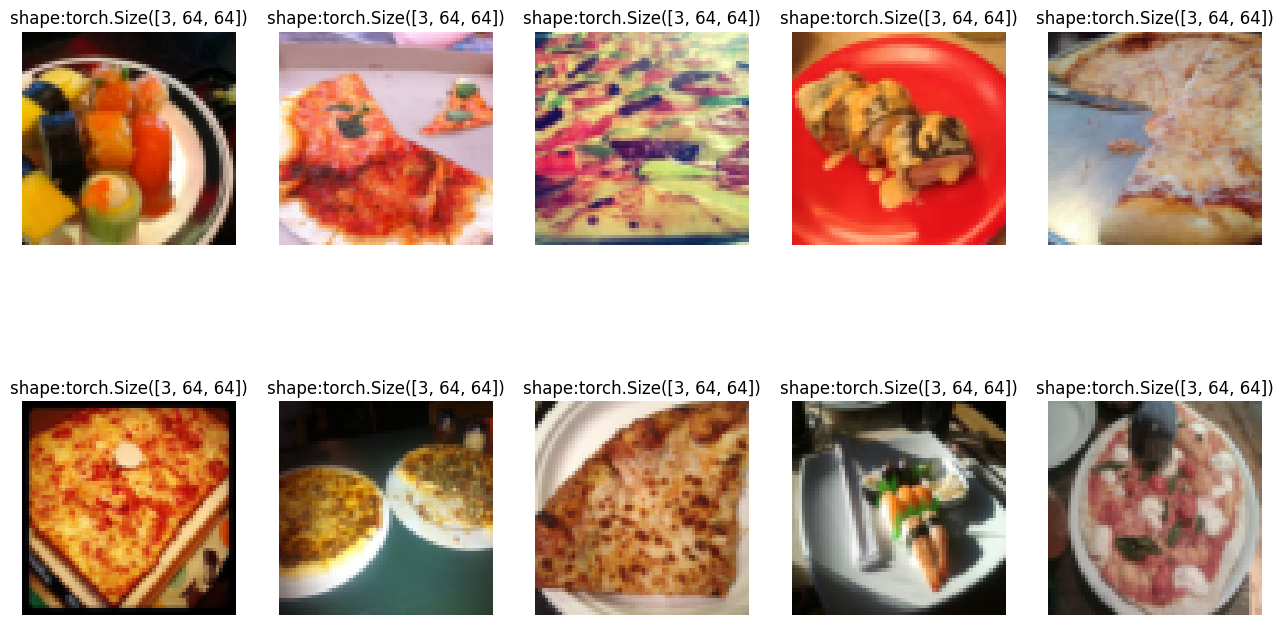

In [52]:
# display reanomd igae from IMageFOlderCUsotom dataset
display_random_images(train_data_custom, train_data_custom.classes)

### Turning our custom dataset into dataloader

In [53]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(train_data_custom, batch_size=BATCH_SIZE, shuffle=True, num_workers=1, pin_memory=True)
test_dataloader_custom = DataLoader(test_data_custom, batch_size=BATCH_SIZE, shuffle=False, num_workers=1, pin_memory=True)


In [ ]:
''' next(iter(train_dataloader_custom)) '''

' next(iter(train_dataloader_custom)) '

In [54]:
# get image and lable from customdataloader
img_custom , label_custom = next(iter(train_dataloader_custom))
print(f"image shape:{img_custom.shape}")
print(f"label shape:{label_custom.shape}")

image shape:torch.Size([32, 3, 64, 64])
label shape:torch.Size([32])


### Other forms of tranforms(data augmentation)
DATA_AUTGMENTATION: in data analysis are techiues used to increase the amout of data by adding sligtly modified copies of already existiong data or newly coreated systetic daat from existing data . it acts as a regulaizor and helps reduce overfitting when traing models. it it closely related to oversampling in data anaysis

lets take a look at one particular type of data augmentaiton used torain pytorch vision modles to state of the art levels...
this praticeit hopefully result sin a model that more generizes to the traing data




In [55]:
#lets look at trivail augment

from torchvision import  transforms

train_tranform= transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_tranform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [56]:
# get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

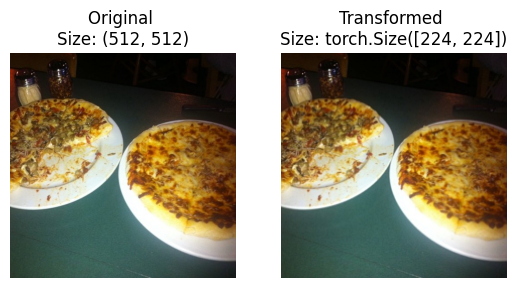

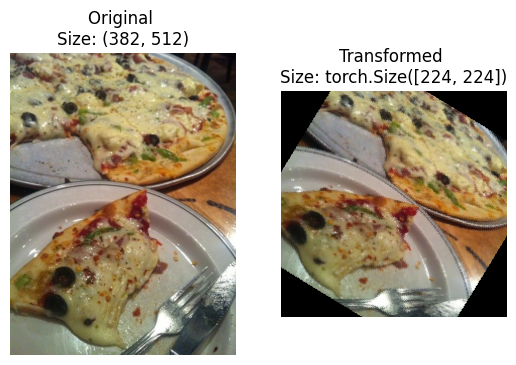

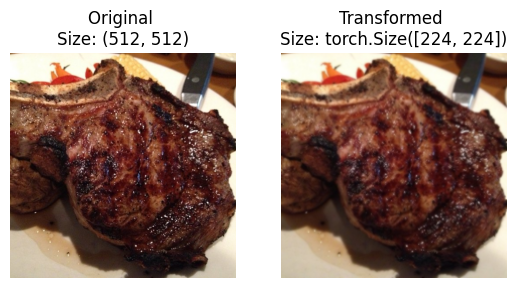

In [57]:
# plot random images
plot_transformed_images(image_path_list, train_tranform, n=3)

### buiding the baseline model

In [58]:
## creating tranforms and load data for model_0
## create simple transform
simple_tranform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [59]:
# Load and Tranform Data
from torchvision import datasets
from torch.utils.data import DataLoader
train_data_simple = datasets.ImageFolder(train_dir, transform=simple_tranform)
test_data_simple = datasets.ImageFolder(test_dir, transform=simple_tranform)


# turn the datasets into DataLoaders
BATCH_SIZE = 32
train_dataloader_simple = DataLoader(train_data_simple, batch_size=BATCH_SIZE, shuffle=True, num_workers=1, pin_memory=True)
test_dataloader_simple = DataLoader(test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=1, pin_memory=True)


### create tinyVGG Modle class

In [61]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=0,stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0,stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, out_features=output_shape)
    )
  def forward(self, x:torch.Tensor):
      return self.classifier(self.conv_block_2(self.conv_block_1(x))) # this will computation go Burr
   # all is done dont forget in the classifier how we know th input shape or do research

'''
the way i know the output size using this formula
- convolution output size( per dimension):
outpusize = (input size - kernel size + 2*padding)/(stride )+1
- max pooling output size(per dimension):
output size = inputsize / stride
hope upto now you understnd where 13*13 comes form after flatterning the tensor
'''


'\nthe way i know the output size using this formula\n- convolution output size( per dimension):\noutpusize = (input size - kernel size + 2*padding)/(stride )+1\n- max pooling output size(per dimension):\noutput size = inputsize / stride \nhope upto now you understnd where 13*13 comes form after flatterning the tensor\n'

In [62]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data_simple.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## try a fowrad pass on a sngle image ( to test the model)

In [63]:
# get a single image batch
image_batch , lable_batch = next(iter(train_dataloader_simple))

# try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02


### USe `torchinfo` to get idea about our model

In [64]:
!pip install torchinfo --quiet

In [65]:
''' this is the library i use for by pytorch model summary not like in tensorflow which has aready built in method for sammy of the model  '''
import torchinfo
from torchinfo import summary

summary(model_0, input_size=(1,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### creating a test and training loop
- `train_step()` - takes in a model and dataloader and trains teh model on the dataloader
- `test_step()` - takes in a model and dataloader and evalutes teh model on the dataloader

In [66]:
# create train_step()
def train_step(model:torch.nn.Module, dataloader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module, optimizer:torch.optim.Optimizer, device:torch.device = device):
  model.train()
  # setup train loss and train accuracy values
  train_loss, train_acc = 0, 0
  # loop thorugh dataloader batches
  for batch, (X,y) in enumerate(dataloader):
    # send data to target device
    X, y = X.to(device), y.to(device)
    # forward pass
    y_pred = model(X)
    # calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    # optimizer zero grad
    optimizer.zero_grad()
    # loss backward
    loss.backward()
    # otpimzer step
    optimizer.step()

    # caclulate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # adjust metrics to get avaerage loss and accuracy per bath
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [67]:
# create a test step
def test_step(model:torch.nn.Module, dataloader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module, device:torch.device = device):
  model.eval()
  with torch.inference_mode():
    test_loss, test_acc = 0, 0
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


### creating  a train() fucntion to combine train_step() and test_step()


In [68]:
from tqdm.auto import tqdm
# create a train function that takes in various mode parametrs
def train(model:torch.nn.Module, train_dataloader:torch.utils.data.DataLoader, test_dataloader:torch.utils.data.DataLoader, optimizer:torch.optim.Optimizer, loss_fn:torch.nn.Module, epochs:int, device:torch.device = device):
  results = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, device)
    test_loss, test_acc = test_step(model, test_dataloader, loss_fn, device)
    print(
        f"Epoch: {epoch+1} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_acc:.4f} | "
        f"test_loss: {test_loss:.4f} | "
        f"test_acc: {test_acc:.4f}"
    )
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results



In [70]:
### Train and evalaute model_0
from timeit import default_timer as timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 100
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

start_time = timer()
model_0_results = train(model=model_0, train_dataloader=train_dataloader_simple, test_dataloader=test_dataloader_simple, optimizer=optimizer, loss_fn=loss_fn, epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0392 | train_acc: 0.5586 | test_loss: 1.0708 | test_acc: 0.3428
Epoch: 2 | train_loss: 0.9895 | train_acc: 0.5820 | test_loss: 1.0756 | test_acc: 0.3731
Epoch: 3 | train_loss: 0.9266 | train_acc: 0.5703 | test_loss: 1.0900 | test_acc: 0.3324
Epoch: 4 | train_loss: 0.9364 | train_acc: 0.5039 | test_loss: 1.0882 | test_acc: 0.3021
Epoch: 5 | train_loss: 0.8483 | train_acc: 0.6445 | test_loss: 1.0668 | test_acc: 0.3210
Epoch: 6 | train_loss: 1.0351 | train_acc: 0.4766 | test_loss: 1.0273 | test_acc: 0.3712
Epoch: 7 | train_loss: 0.8070 | train_acc: 0.6250 | test_loss: 1.0521 | test_acc: 0.4953
Epoch: 8 | train_loss: 0.8153 | train_acc: 0.6758 | test_loss: 1.0162 | test_acc: 0.3722
Epoch: 9 | train_loss: 0.9286 | train_acc: 0.4844 | test_loss: 1.0337 | test_acc: 0.3617
Epoch: 10 | train_loss: 0.8291 | train_acc: 0.6562 | test_loss: 0.9672 | test_acc: 0.5246
Epoch: 11 | train_loss: 0.7909 | train_acc: 0.6719 | test_loss: 0.9901 | test_acc: 0.4129
Epoch: 12 | train_l

In [71]:
model_0_results

{'train_loss': [1.0392323583364487,
  0.9894604757428169,
  0.9266144335269928,
  0.936371386051178,
  0.8482579700648785,
  1.0350543856620789,
  0.8070177659392357,
  0.8152776062488556,
  0.928596742451191,
  0.8290590643882751,
  0.7909119799733162,
  0.7715204209089279,
  0.7949654012918472,
  0.7755372263491154,
  0.9325786232948303,
  0.7370780520141125,
  0.7966099008917809,
  0.7522740736603737,
  0.7174102663993835,
  0.7916046380996704,
  0.7560125067830086,
  0.8883928135037422,
  0.6922484487295151,
  0.7598879486322403,
  0.6896222531795502,
  0.7546535283327103,
  0.7464630678296089,
  0.6931096017360687,
  0.6968763917684555,
  0.7127671614289284,
  0.6626815535128117,
  0.6627580262720585,
  0.6247522886842489,
  0.8942238725721836,
  0.7730335518717766,
  0.7954657226800919,
  0.8246408402919769,
  0.7453024461865425,
  0.6291628442704678,
  0.8007286414504051,
  0.7561895735561848,
  0.6444148942828178,
  0.5982358567416668,
  0.5699680261313915,
  0.6531320586800575

### plot the loss curves of model_0
**loss curve** eis aywa to trucking your model over time

you can look the loss curves online

In [72]:
# get the modle_0 results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [73]:
def plot_loss_curves(results:Dict[str,list[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]
  epochs = range(len(results["train_loss"]))
  plt.figure(figsize=(15,7))
  plt.subplot
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()


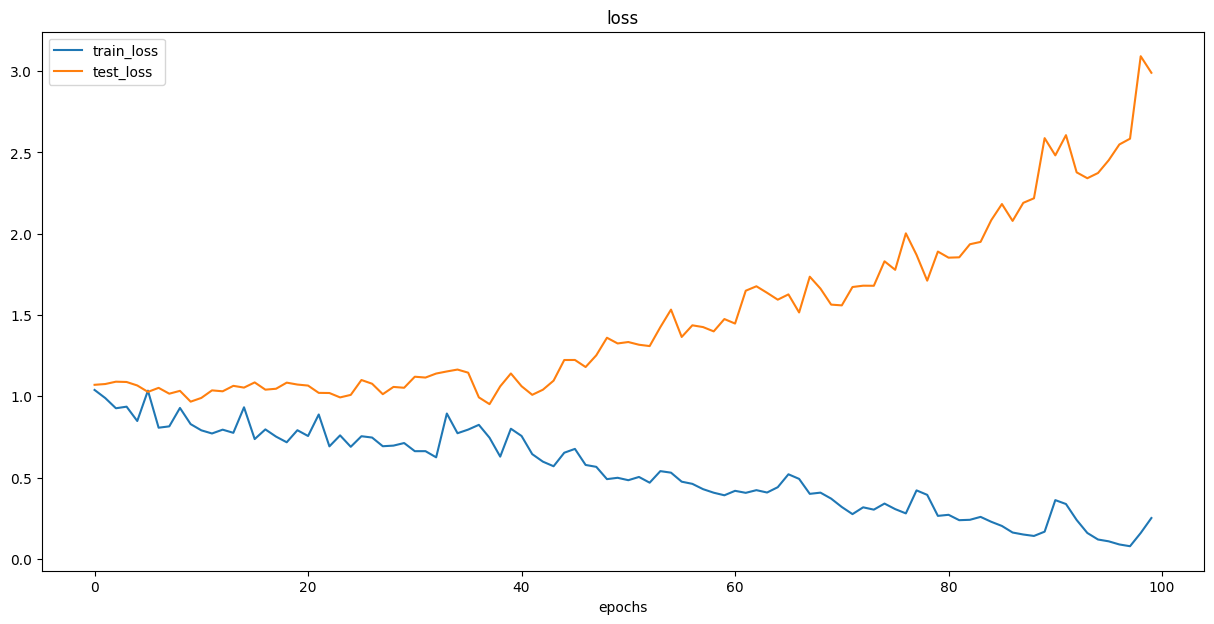

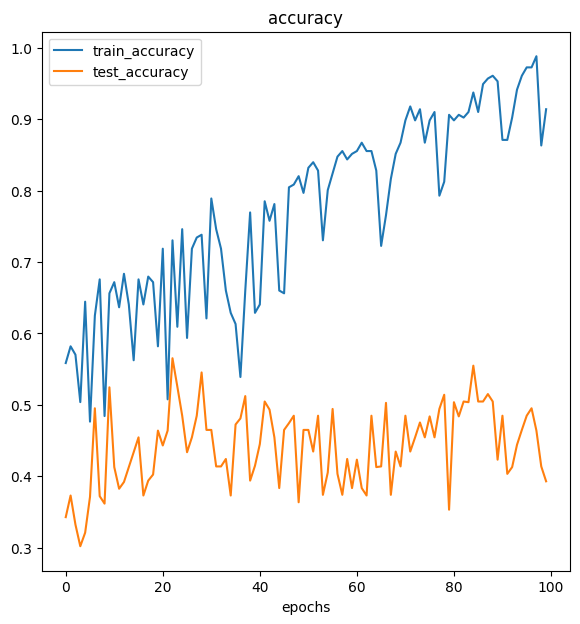

In [74]:
plot_loss_curves(model_0_results)

### what should an ideal loss curve look like ?

a loss curve is one of the way to evaluate the model


#### dealing with overfitting

- get more data: give a model more of a chance to learn patterns between samples eg if a model is performing poorly on images of pizza, show it more images of pizza

- data augmentaion: increase the diversity of yoru training dataset without collectng more data ( eg take yoru photos of pizza and randomly rotet them 30 degrees ) increased diveritly forces a model to leanr more genearation patterns

- better data: non all data samples are created equally . removing poor samples from or adding better sampels to your dataset can imporve your models perfomance

- use tranfer leanring : take models per-learned patterns form one porblme and tweak them to suit your own problem . for exaple , take a model trained on picture of cars to recognize pictures of tracks

- simpligy your model: if the current model is already overfitting the training data, it may be too complicated of a model . thsi means its leanring the patteerns of the data too well and ist able to genearize wel on unseen data. one way to simplify a modle is to reudce the numberof layers it uses or to reduce the number of hidden units in each layer


- use learning rate decay: the ideal here it to slowy decrease the leanring rate as the model trains. this is a machine for a coin the back of a counch. the closer you get the smaller your step .the same with the leanring rate . the closer you get to convergence , teh smaller yourl want your weight updates to be


- use early stopping: erly stopping stops model training before it begins to overfit . as in say the models los has stopped decressing for he past 10 epochs this number is abitary you want to stop the model traing and go with the modle weights that had the lowerst loss  10 epocsh prior


### dealing with underfitting

add more layers/untis to yoru model: if yor model is underfitting , it may not have enough capability to learn the requried patterns weights / represetatios of the data to be predictive. one way to add more predictive power to your model  is to increase the number of hidden layers / units within those layes.


tweek the learning rate: perhaps your models learning rate is too hight to begin with . and its tying to update its weights each epoch too much, in turn not leanring anything in this case you might lower the learning rate and see whwt happesn

train for longer: sometimes a model just needs more time to elarn representations of data . if you find in your smaller expreiments your model inst learning anything perhaps learving it train for a more epochs may result in better performance.

user tranfer learning: take a models per-learned patterns from one problem and tweak them to usit yoru own problem. for examle take a model trained on pictures of cars to recognise pictures of a truck
use less regulation: perhaps your mode is underfitting becuase youre trying to prevetn overfitting too much holding back on regulaization technhiques can help your model fit the dat better.



### model 1 tinyvgg with data augmentation

let try another modelling exprement this time using the same model as before with some slight data augmenation.


### createa tranform with data augmentation

In [75]:
# create trainging tranfoorm with TrivailAugmentation
from torchvision import transforms

train_tranform_trivaial = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.TrivialAugmentWide(num_magnitude_bins=31),
        transforms.ToTensor()
    ]
)

test_tranform_simple = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.ToTensor()
    ]
)



### create train and test datasets and dataloaders with data augmentation

In [76]:
# turn image folders into datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_tranform_trivaial)
test_data_augmented = datasets.ImageFolder(test_dir, transform=test_tranform_simple)
# turn datasets into dataloaders
BATCH_SIZE = 32
train_dataloader_augmented = DataLoader(train_data_augmented, batch_size=BATCH_SIZE, shuffle=True, num_workers=1, pin_memory=True)
test_dataloader_augmented = DataLoader(test_data_augmented, batch_size=BATCH_SIZE, shuffle=False, num_workers=1, pin_memory=True)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1037 | train_acc: 0.2500 | test_loss: 1.1004 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0726 | train_acc: 0.4258 | test_loss: 1.1331 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0811 | train_acc: 0.4258 | test_loss: 1.1684 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1230 | train_acc: 0.3047 | test_loss: 1.1505 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0859 | train_acc: 0.3477 | test_loss: 1.1498 | test_acc: 0.2708
Epoch: 6 | train_loss: 1.0916 | train_acc: 0.3984 | test_loss: 1.1320 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0411 | train_acc: 0.5859 | test_loss: 1.1236 | test_acc: 0.3229
Epoch: 8 | train_loss: 1.0772 | train_acc: 0.5117 | test_loss: 1.1146 | test_acc: 0.3021
Epoch: 9 | train_loss: 1.0701 | train_acc: 0.4258 | test_loss: 1.0864 | test_acc: 0.3532
Epoch: 10 | train_loss: 1.0061 | train_acc: 0.4297 | test_loss: 0.9766 | test_acc: 0.3712
Epoch: 11 | train_loss: 0.9304 | train_acc: 0.5742 | test_loss: 0.9931 | test_acc: 0.3627
Epoch: 12 | train_l

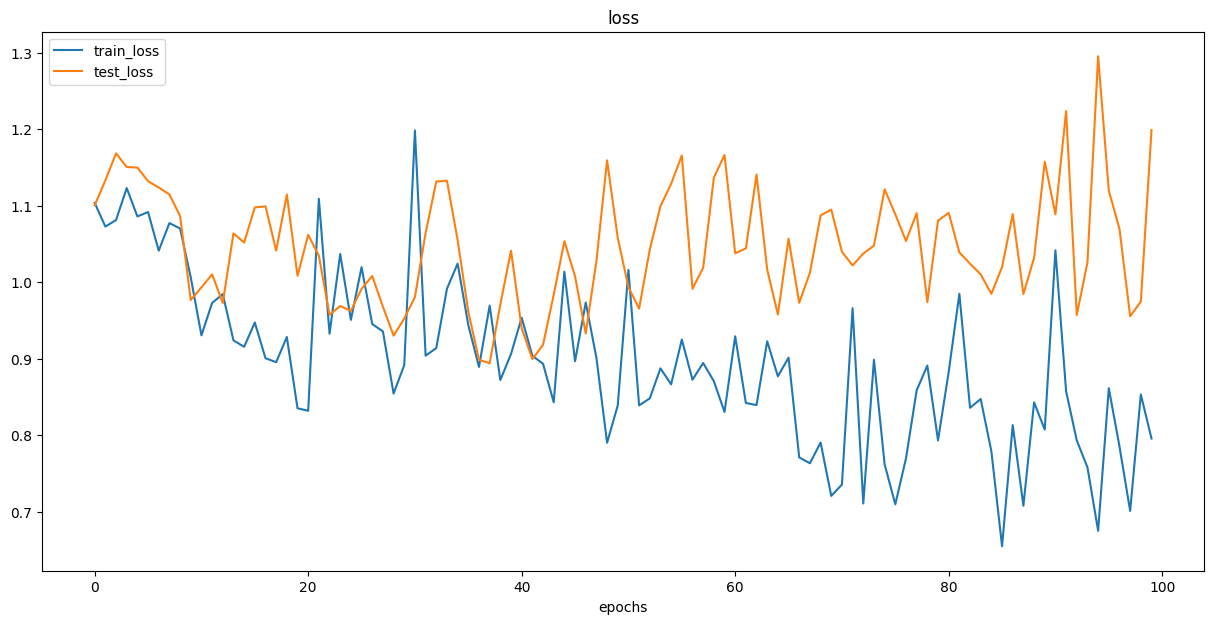

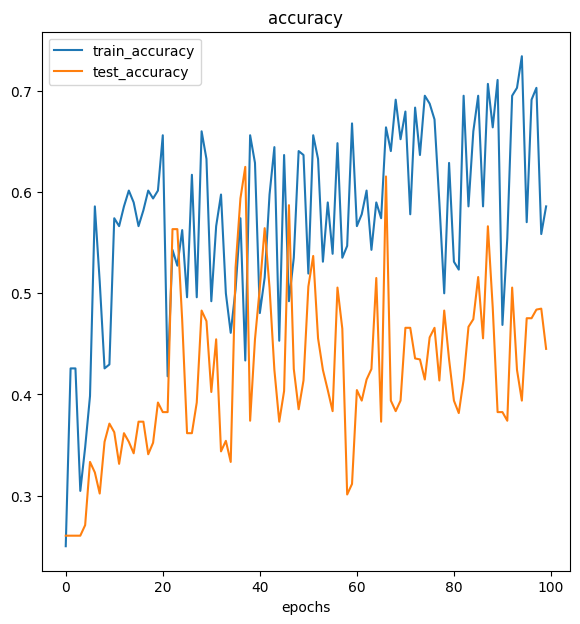

In [77]:
# create a model
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data_augmented.classes)).to(device)
# train model_1
torch.manual_seed(42)
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
NUM_EPOCHS = 100
start_time = timer()
model_1_results = train(model=model_1, train_dataloader=train_dataloader_augmented, test_dataloader=test_dataloader_augmented, optimizer=optimizer, loss_fn=loss_fn, epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")
# test the model
plot_loss_curves(model_1_results)


### making a prediction on a custom iamge

In [78]:
# downlaod a custom image
import requests

# setup custom image path

custom_image_path = data_path / '04-pizza-dad.jpeg'

# download custom image
if not custom_image_path.is_file():
  img_url = "https://github.com/lewisnjue/AI/blob/main/pizza.jpeg?raw=true"
  img_bytes = requests.get(img_url).content
  with open(custom_image_path, "wb") as f:
    f.write(img_bytes)
else:
  print(f"{custom_image_path} already exists")

# read in custom image
print(custom_image_path)
import torchvision
from PIL import Image

# Try opening the image with Pillow to check if it's valid
try:
    img = Image.open(custom_image_path)
    img.close() # Close the image after verification
except Exception as e:
    print(f"Error opening image with Pillow: {e}")
    # Handle the error, e.g., re-download the image

# If Pillow can open it, proceed with torchvision
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image_uint8

data/04-pizza-dad.jpeg


tensor([[[255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]],

        [[255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]],

        [[255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]]]

### loaing in a custom image with pytorch
we have to make sure our custom image is in the same foramet as the our model was trained on

* in tensor form datatype
* of shape 64*64*3


In [79]:
custom_image_uint8.shape

torch.Size([3, 148, 149])

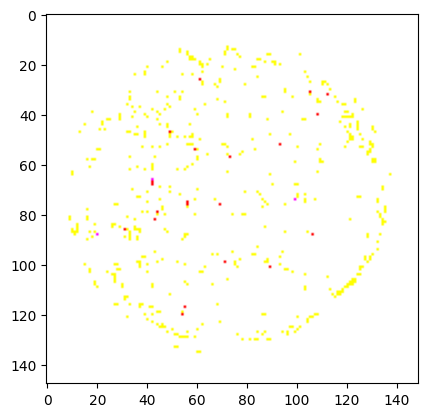

In [80]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [81]:
print(custom_image_uint8.shape)

torch.Size([3, 148, 149])


### Making a prediction on a custom image with a trained pytorch model


In [82]:
# try to make a prediction on an image
model_1.eval()
with torch.inference_mode():
  custom_image_uint8 = custom_image_uint8.to(device)

In [83]:
custom_image_uint8.shape

torch.Size([3, 148, 149])

In [84]:
#create tranform pipline to resize the image
custom_transform = transforms.Compose(
    [
        transforms.Resize((64,64)),
    ]
)
# tranfomr the image and predict the class
custom_image_uint8 = custom_transform(custom_image_uint8)
custom_image_uint8.shape
# predict using model_1
with torch.inference_mode():
  custom_image_uint8 = custom_image_uint8.unsqueeze(dim=0)
  custom_image_uint8 = custom_image_uint8.to(device)
  custom_pred_logits = model_1(custom_image_uint8)
  custom_pred_probs = torch.softmax(custom_pred_logits, dim=1)
  custom_pred_label = torch.argmax(custom_pred_probs, dim=1)
  print(f"custom image pred: {custom_pred_label}")
  print(f"custom image pred prob: {custom_pred_probs.max():.3f}")
  print(f"custom image class: {train_data_augmented.classes[custom_pred_label]}")


custom image pred: tensor([0], device='cuda:0')
custom image pred prob: 1.000
custom image class: pizza
